In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#checking for null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#missing value imputation
gen_mode = train_df.Gender.mode()
print(f'Mode value of Gender is {gen_mode[0]}')
train_df['Gender'] = train_df['Gender'].replace(np.nan,gen_mode[0])
train_df.Gender.value_counts()

Mode value of Gender is Male


Gender
Male      502
Female    112
Name: count, dtype: int64

In [8]:
marr_mode = train_df.Married.mode()
print(f'Mode value of Married is {marr_mode[0]}')
train_df['Married'] = train_df['Married'].replace(np.nan,marr_mode[0])
train_df.Married.value_counts()

Mode value of Married is Yes


Married
Yes    401
No     213
Name: count, dtype: int64

In [9]:
dep_mode = train_df.Dependents.mode()
print(f'Mode value of Dependents is {dep_mode[0]}')
train_df['Dependents'] = train_df['Dependents'].replace(np.nan,dep_mode[0])
print(train_df.Dependents.value_counts())

Mode value of Dependents is 0
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


In [10]:
se_mode = train_df['Self_Employed'].mode()
print(f'Mode value of Self Employed is {se_mode[0]}')
train_df['Self_Employed'] = train_df['Self_Employed'].replace(np.nan,se_mode[0])
print(train_df['Self_Employed'].value_counts())

Mode value of Self Employed is No
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


In [11]:
print('median is ',train_df.LoanAmount.median())
print('mean is ',train_df.LoanAmount.mean())
# mean is biased hence using median for imputation
train_df.LoanAmount = train_df.LoanAmount.replace(np.nan,train_df.LoanAmount.median())

median is  128.0
mean is  146.41216216216216


In [12]:
print('median is ',train_df.Loan_Amount_Term.median())
print('mean is ',train_df.Loan_Amount_Term.mean())
# mean is biased hence using median for imputation
train_df.Loan_Amount_Term = train_df.Loan_Amount_Term.replace(np.nan,train_df.Loan_Amount_Term.median())

median is  360.0
mean is  342.0


In [13]:
print('median is ',train_df.Credit_History.median())
print('mean is ',train_df.Credit_History.mean())
# mean is biased hence using median for imputation
train_df.Credit_History = train_df.Credit_History.replace(np.nan,train_df.Credit_History.median())

median is  1.0
mean is  0.8421985815602837


In [14]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#splitting numerical and categorical variables
num_df = train_df.select_dtypes('number').copy()
cat_df = train_df.select_dtypes('object').copy()
cat_df.drop('Loan_Status',inplace  = True,axis = 1)
cat_df.drop('Loan_ID',inplace  = True,axis = 1)


In [16]:
cat_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
cat_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [19]:
encoder1 = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False)
encoded_data1 = encoder1.fit_transform(cat_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']])
encoded_df1 = pd.DataFrame(encoded_data1, columns=encoder1.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']))
encoded_df1.index = cat_df.index
cat_df = pd.concat([cat_df, encoded_df1], axis=1)

In [20]:
cat_df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],inplace  = True,axis = 1)

In [21]:
cat_df.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [22]:
cat_df.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
num_df.index = cat_df.index
df_new = pd.concat([num_df,cat_df],axis = 1)

In [25]:
df_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [26]:
df_new.shape

(614, 20)

In [27]:
from matplotlib import pyplot as plt

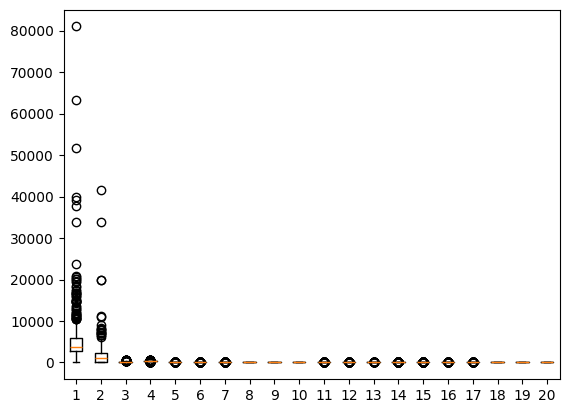

In [28]:
plt.boxplot(df_new)
plt.show()

In [29]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [30]:
cols = df_new.columns.tolist()
for col in cols:
    df_new[col] = remove_outliers(df_new,col)

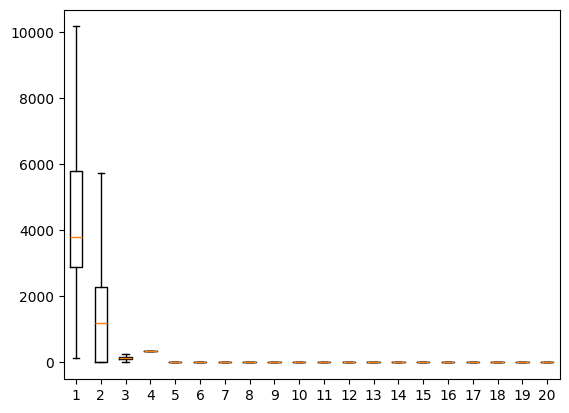

In [31]:
plt.boxplot(df_new)
plt.show()

In [32]:
df_new.shape

(614, 20)

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(scaled_data, columns=df_new.columns)
print(df_scaled.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.568692           0.000000    0.471287               0.0   
1         0.442360           0.262575    0.471287               0.0   
2         0.284396           0.000000    0.225743               0.0   
3         0.242784           0.410578    0.439604               0.0   
4         0.583760           0.000000    0.522772               0.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             0.0            0.0          0.0         1.0          0.0   
1             0.0            0.0          0.0         0.0          1.0   
2             0.0            0.0          0.0         0.0          1.0   
3             0.0            0.0          0.0         0.0          1.0   
4             0.0            0.0          0.0         1.0          0.0   

   Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0           1.0           0.0           0.0            0.0   
1   

In [34]:
df_scaled.shape

(614, 20)

In [35]:
train_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [36]:
df_scaled['Loan_Status'] = train_df['Loan_Status'].map({'Y':1,'N':0})

In [37]:
df_scaled.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status'],
      dtype='object')

In [38]:
X = df_scaled.drop('Loan_Status',axis =1)
y = df_scaled['Loan_Status']

In [39]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X,y)

RandomForestClassifier(random_state=42)

### Test _ Data _

In [42]:
test_df = pd.read_csv('test_lAUu6dG.csv')

In [43]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [44]:
#dropping Loan ID from test data
loan_ids = test_df[['Loan_ID']]
test_df.drop('Loan_ID',axis = 1,inplace = True)

In [45]:
#missing value imputation
gen_mode1 = test_df.Gender.mode()
print(f'Mode value of Gender is {gen_mode1[0]}')
test_df['Gender'] = test_df['Gender'].replace(np.nan,gen_mode1[0])
test_df.Gender.value_counts()

Mode value of Gender is Male


Gender
Male      297
Female     70
Name: count, dtype: int64

In [46]:
dep_mode1 = test_df.Dependents.mode()
print(f'Mode value of Dependents is {dep_mode1[0]}')
test_df['Dependents'] = test_df['Dependents'].replace(np.nan,dep_mode1[0])
print(test_df.Dependents.value_counts())

Mode value of Dependents is 0
Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64


In [47]:
se_mode1 = test_df['Self_Employed'].mode()
print(f'Mode value of Self Employed is {se_mode1[0]}')
test_df['Self_Employed'] = test_df['Self_Employed'].replace(np.nan,se_mode1[0])
print(test_df['Self_Employed'].value_counts())

Mode value of Self Employed is No
Self_Employed
No     330
Yes     37
Name: count, dtype: int64


In [48]:
print('median is ',test_df.Credit_History.median())
print('mean is ',test_df.Credit_History.mean())
# mean is biased hence using median for imputation
test_df.Credit_History = test_df.Credit_History.replace(np.nan,test_df.Credit_History.median())

median is  1.0
mean is  0.8254437869822485


In [49]:
print('median is ',test_df.LoanAmount.median())
print('mean is ',test_df.LoanAmount.mean())
# mean is biased hence using median for imputation
test_df.LoanAmount = test_df.LoanAmount.replace(np.nan,test_df.LoanAmount.median())

median is  125.0
mean is  136.13259668508286


In [50]:
print('median is ',test_df.Loan_Amount_Term.median())
print('mean is ',test_df.Loan_Amount_Term.mean())
# mean is biased hence using median for imputation
test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.replace(np.nan,test_df.Loan_Amount_Term.median())

median is  360.0
mean is  342.53739612188366


In [51]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
test_df.shape

(367, 11)

In [53]:
test_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
#splitting numerical and categorical variables
num_df1 = test_df.select_dtypes('number').copy()
cat_df1 = test_df.select_dtypes('object').copy()

In [55]:
print(num_df1.columns)
print(cat_df1.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [56]:
encoder2 = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False)
encoded_data2 = encoder2.fit_transform(cat_df1[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']])
encoded_df2 = pd.DataFrame(encoded_data2, columns=encoder2.get_feature_names_out(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']))
encoded_df2.index = cat_df1.index
cat_df1 = pd.concat([cat_df1, encoded_df2], axis=1)

In [57]:
cat_df1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],inplace  = True,axis = 1)

In [58]:
cat_df1.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [59]:
num_df1.index = cat_df1.index
df_new2 = pd.concat([num_df1,cat_df1],axis = 1)

In [60]:
df_new2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [61]:
df_new2.shape

(367, 20)

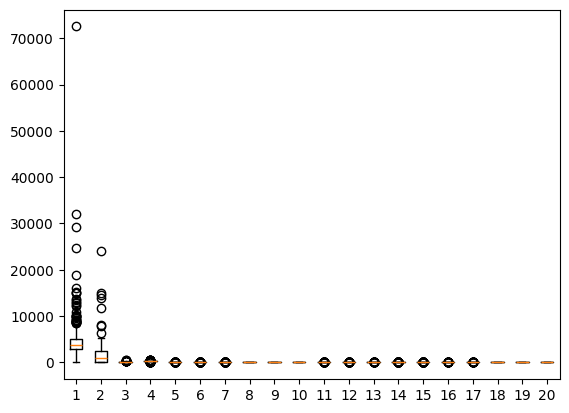

In [62]:
plt.boxplot(df_new2)
plt.show()

In [63]:
cols = df_new2.columns.tolist()
for col in cols:
    df_new2[col] = remove_outliers(df_new2,col)

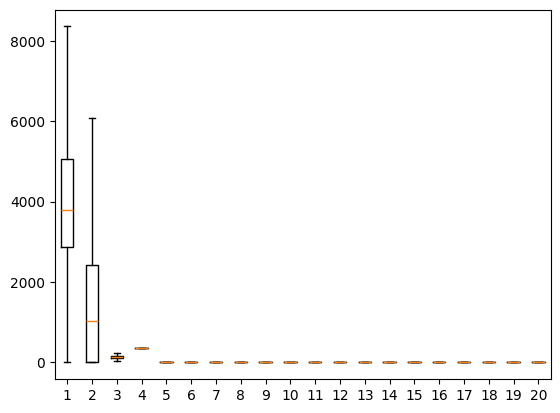

In [64]:
plt.boxplot(df_new2)
plt.show()

In [65]:
df_new2.shape

(367, 20)

In [66]:
scaler1 = MinMaxScaler()
scaled_data1 = scaler.fit_transform(df_new2)
df_scaled1 = pd.DataFrame(scaled_data1, columns=df_new2.columns)
print(df_scaled1.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.684702           0.000000    0.382730               0.0   
1         0.368207           0.246863    0.457410               0.0   
2         0.598516           0.296235    0.840140               0.0   
3         0.280105           0.419008    0.336056               0.0   
4         0.392147           0.000000    0.233372               0.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             0.0            0.0          0.0         0.0          1.0   
1             0.0            0.0          0.0         0.0          1.0   
2             0.0            0.0          0.0         0.0          1.0   
3             0.0            0.0          0.0         0.0          1.0   
4             0.0            0.0          0.0         1.0          0.0   

   Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0           1.0           0.0           0.0            0.0   
1   

In [67]:
df_scaled1.shape

(367, 20)

In [68]:
y_pred = rf_classifier.predict(df_scaled1)

In [69]:
predicted_val = pd.DataFrame(y_pred,columns=['Loan_Status'])

In [70]:
predicted_val['Loan_Status'] = predicted_val['Loan_Status'].map({0:'N',1:'Y'})

In [71]:
predicted_val.index = loan_ids.index
predicted_val = pd.concat([loan_ids,predicted_val],axis = 1)

In [72]:
predicted_val.to_csv('Final_values.csv',index = False)